# 1 Inclusione solo dei tweet associati agli utenti bot

## 1.1 Estrazione degli utenti bot

In [2]:
import pandas as pd

# Specifico il percorso del file
bot_user = pd.read_csv('content/identificazione.csv')

# Mostro le prime righe del dataset
print(bot_user.head())

        username  bot_score
0     1Gbemileke     0.2100
1      45LVNancy     0.4975
2   4TheRecordUK     0.3900
3    AdamSwattii     0.1200
4  AlArabiya_Eng     0.0900


## 1.2 Estrazione del dataset iniziale

In [3]:
import pandas as pd

# Specifico il percorso del file
df = pd.read_csv('../Dataset/Sentiment_en_tweet_2023.csv', sep=";")

# Mostro le prime righe del dataset
print(df.head())

C:\Users\smike18\AppData\Local\Temp\ipykernel_17664\2441164224.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Dataset/Sentiment_en_tweet_2023.csv', sep=";")


                userid         username  \
0             22240612    AlArabiya_Eng   
1            125228341      apple2hotel   
2  1365269072598941698  TerryTheTipste1   
3  1295405245011460096  MayadeenEnglish   
4  1508116470051528705    FloranceOlman   

                                            acctdesc  \
0  The Arab world’s leading source of global news...   
1  Travel bookings can be made online through a t...   
2  Sports Nut, Tipping Enthusiast. 80s music addi...   
3  The official Twitter page of Al Mayadeen Engli...   
4    𝙁𝙍𝙀𝙀 𝙎𝙋𝙄𝙉𝙎 𝘾𝙊𝙄𝙉 𝙈𝘼𝙎𝙏𝙀𝙍\nhttps://t.co/tXeaFea755   

                   location  following  followers  totaltweets  \
0                     Dubai         46     927188       337714   
1  United States of America         93         36          335   
2              South Africa       4122       1973        23131   
3                       NaN          7      18833        40331   
4                       NaN         75      29350         8148   

       

In [42]:
# Visualizzo le intestazioni (colonne) del dataset
print(df.columns)

Index(['userid', 'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'is_retweet', 'original_tweet_id',
       'original_tweet_userid', 'original_tweet_username',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id',
       'quoted_status_userid', 'quoted_status_username', 'extractedts',
       'sentiment', 'score'],
      dtype='object')


## 1.3 Analisi di "bot_score"

In [14]:
!pip install seaborn

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 2.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.8 MB 2.7 MB/s eta 0:00:03
   -------- ------------------------------- 1.6/7.8 MB 2.6 MB/s eta 0:00:03
   ------------ --------------------------- 2.4/7.8 MB 2.6 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/7.8 MB 2.6 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/7.8 MB 2.6 MB/s eta 0:00:02
   -------------------- ------------------- 3.9/7.8 MB 2.6 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/7.8 MB 2.6 MB/s eta 0:00:02
   ------------------------- -------------- 5.0/7.8 MB 2.6 MB/s eta 0:00:02
   ---------------------------- ----------- 5.5/7.8 MB 2.6 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 2.6 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 2.6 MB/s eta 0:00:01
   ----------------

In [17]:
!pip install scipy

   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/44.8 MB 2.4 MB/s eta 0:00:19
    --------------------------------------- 1.0/44.8 MB 2.5 MB/s eta 0:00:18
   - -------------------------------------- 1.6/44.8 MB 2.5 MB/s eta 0:00:18
   - -------------------------------------- 2.1/44.8 MB 2.6 MB/s eta 0:00:17
   -- ------------------------------------- 2.6/44.8 MB 2.6 MB/s eta 0:00:17
   -- ------------------------------------- 3.1/44.8 MB 2.6 MB/s eta 0:00:17
   --- ------------------------------------ 3.7/44.8 MB 2.6 MB/s eta 0:00:16
   --- ------------------------------------ 4.2/44.8 MB 2.6 MB/s eta 0:00:16
   ---- ----------------------------------- 5.0/44.8 MB 2.6 MB/s eta 0:00:16
   ---- ----------------------------------- 5.5/44.8 MB 2.6 MB/s eta 0:00:16
   ----- ---------------------------------- 6.0/44.8 MB 2.6 MB/s eta 0:00:15
   ----- ---------------------------------- 6.6/44.8 MB 2.6 MB/s eta 0:00:15
   ---

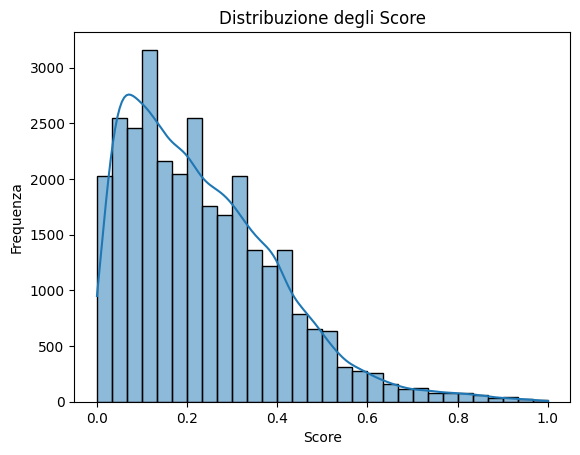

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot della distribuzione
sns.histplot(data=bot_user, x='bot_score', kde=True, bins=30)
plt.xlabel('Score')
plt.ylabel('Frequenza')
plt.title('Distribuzione degli Score')
plt.show()


C:\Users\smike18\anaconda3\envs\r-python-env\lib\site-packages\scipy\stats\_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


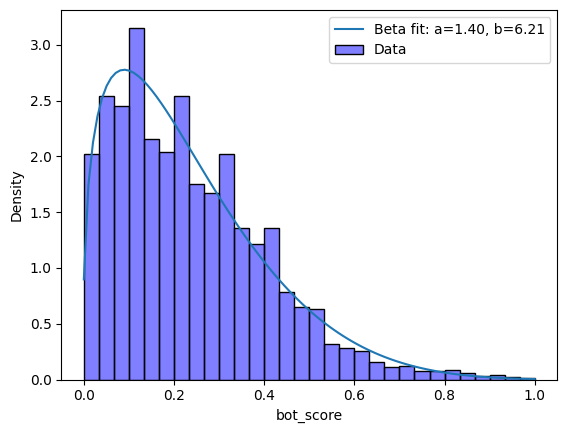

In [20]:
from scipy.stats import beta, norm

# Adatto una distribuzione beta agli score
a, b, loc, scale = beta.fit(bot_user['bot_score'])

# Visualizzo la distribuzione stimata
import numpy as np
x = np.linspace(0, 1, 100)
pdf = beta.pdf(x, a, b, loc, scale)
plt.plot(x, pdf, label=f'Beta fit: a={a:.2f}, b={b:.2f}')
sns.histplot(bot_user['bot_score'], kde=False, bins=30, stat='density', label='Data', color='blue', alpha=0.5)
plt.legend()
plt.show()


## 1.4 Individuazione soglia di affidabilità degli score

In [22]:
# Soglia al 90° percentile
threshold = bot_user['bot_score'].quantile(0.90)
print(f"Soglia (90° percentile): {threshold}")

Soglia (90° percentile): 0.46


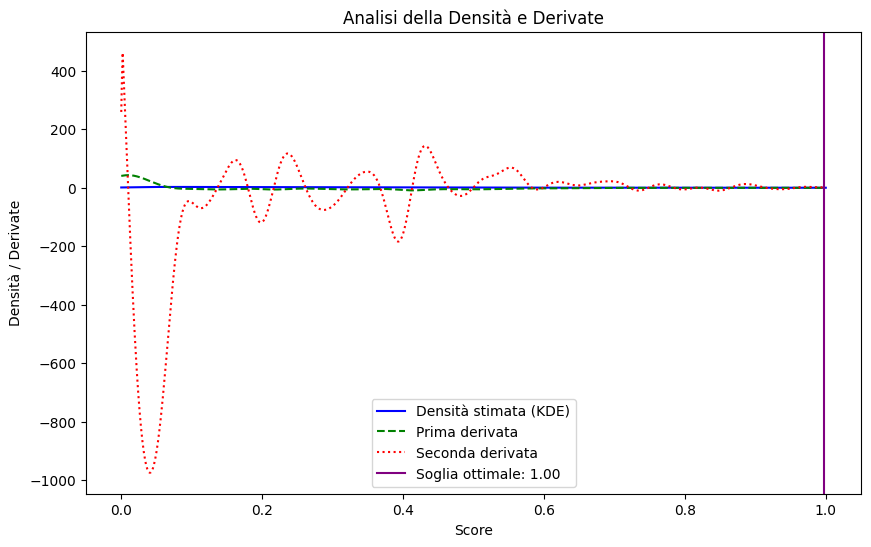

La soglia ottimale basata sul cambio nella densità è: 1.00


In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy.stats import gaussian_kde

scores = bot_user['bot_score'].values

# 1. Stima della densità con KDE
kde = gaussian_kde(scores)
x = np.linspace(0, 1, 1000)  # Genero valori per la funzione di densità
density = kde(x)

# 2. Calcolo della prima e seconda derivata
density_derivative = np.gradient(density, x)
density_second_derivative = np.gradient(density_derivative, x)

# 3. Identificazione dei massimi e minimi della seconda derivata
min_indices = argrelextrema(density_second_derivative, np.less)[0]
max_indices = argrelextrema(density_second_derivative, np.greater)[0]

# Seleziono il massimo assoluto o un punto rilevante
if len(max_indices) > 0:
    optimal_threshold = x[max_indices[-1]]  # Ultimo massimo della seconda derivata
else:
    print("Nessun massimo trovato nella derivata seconda.")
    optimal_threshold = None

# 4. Visualizzazione
plt.figure(figsize=(10, 6))

# Plot della densità
plt.plot(x, density, label='Densità stimata (KDE)', color='blue')

# Prima derivata
plt.plot(x, density_derivative, label='Prima derivata', color='green', linestyle='--')

# Seconda derivata
plt.plot(x, density_second_derivative, label='Seconda derivata', color='red', linestyle=':')

# Evidenzio il punto scelto
if optimal_threshold is not None:
    plt.axvline(optimal_threshold, color='purple', linestyle='-', label=f'Soglia ottimale: {optimal_threshold:.2f}')

plt.xlabel('Score')
plt.ylabel('Densità / Derivate')
plt.title('Analisi della Densità e Derivate')
plt.legend()
plt.show()

# Risultato della soglia
if optimal_threshold is not None:
    print(f"La soglia ottimale basata sul cambio nella densità è: {optimal_threshold:.2f}")

### 1.4.1 Scelta dell'ultimo punto di flesso

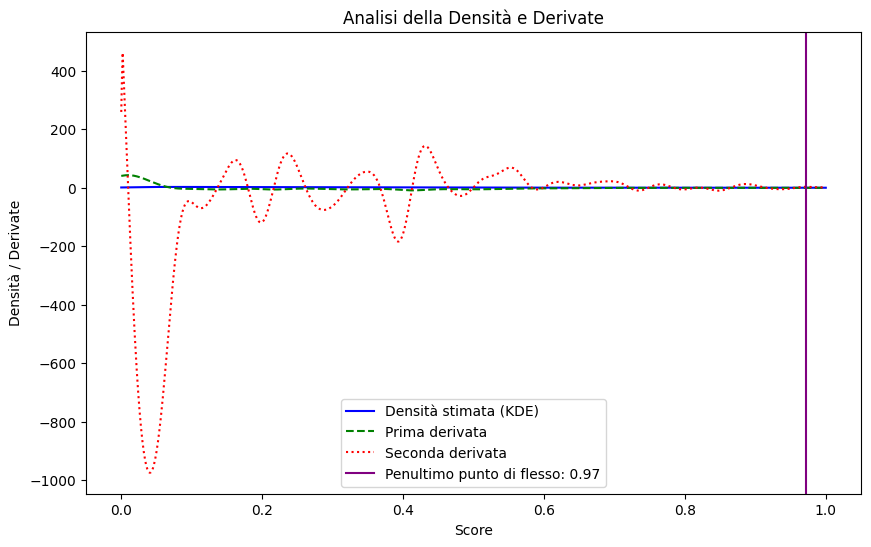

Il penultimo punto di flesso si trova a: 0.97


In [28]:
import numpy as np
from scipy.signal import argrelextrema
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Supponiamo che dataset['score'] contenga gli score
scores = bot_user['bot_score'].values

# 1. Stima della densità con KDE
kde = gaussian_kde(scores)
x = np.linspace(0, 1, 1000)  # Genero valori per la funzione di densità
density = kde(x)

# 2. Calcolo della prima e seconda derivata
density_derivative = np.gradient(density, x)
density_second_derivative = np.gradient(density_derivative, x)

# 3. Trovo i massimi locali della seconda derivata (i punti di flesso)
# L'argrelextrema trova i massimi locali nella seconda derivata
max_indices = argrelextrema(density_second_derivative, np.greater)[0]

# 4. Trovo il penultimo massimo (secondo massimo)
if len(max_indices) > 1:
    penultimate_flex_point = x[max_indices[-2]]  # Penultimo massimo nella seconda derivata
else:
    print("Non ci sono abbastanza massimi locali per trovare il penultimo punto di flesso.")
    penultimate_flex_point = None

# 5. Visualizzazione
plt.figure(figsize=(10, 6))

# Traccia la densità stimata
plt.plot(x, density, label='Densità stimata (KDE)', color='blue')

# Prima derivata
plt.plot(x, density_derivative, label='Prima derivata', color='green', linestyle='--')

# Seconda derivata
plt.plot(x, density_second_derivative, label='Seconda derivata', color='red', linestyle=':')

# Evidenzia il penultimo punto di flesso
if penultimate_flex_point is not None:
    plt.axvline(penultimate_flex_point, color='purple', linestyle='-', label=f'Penultimo punto di flesso: {penultimate_flex_point:.2f}')

plt.xlabel('Score')
plt.ylabel('Densità / Derivate')
plt.title('Analisi della Densità e Derivate')
plt.legend()
plt.show()

# Stampa il risultato
if penultimate_flex_point is not None:
    print(f"Il penultimo punto di flesso si trova a: {penultimate_flex_point:.2f}")

## 1.5 prendo solo gli utenti con score 0.97

In [5]:
import pandas as pd

# Applico una tolleranza di 0,02 per selezionare gli utenti con score vicini a 0,97
tolleranza = 0.02
soglia = 0.97

# Filtro gli utenti con score compreso tra (0.97 - tolleranza) e (0.97 + tolleranza)
utenti_con_97 = bot_user[(bot_user['bot_score'] >= (soglia - tolleranza))]

# Mostro gli utenti filtrati
print(utenti_con_97)

              username  bot_score
1667           SAONT69       0.95
3130     BentleyRobber       0.95
3719          alhayu14       0.99
5864     triplensocool       0.95
6375   beKlogfD1fzlTRJ       1.00
6927     real_joekhid0       0.96
7209           _l3sl13       0.99
7313       Kaywhitex55       0.97
7951   abdulsalammanso       0.95
7953    Abhishek400004       0.95
8544   AmeliaAnisovych       0.96
10208    SukaPutinchik       0.96
11297  Sangeet15767170       0.95
11990  ReaderfromWorld       0.98
15339  bugajski_lukasz       0.95
17000         Oleksank       0.98
18055         clbear31       0.98
19514      SKMahfu6119       0.95
20627       BMoradilla       0.95
22690   _RAKSHITSharma       0.99
22932  AudiobooksOnlyn       0.95
23135    Criptomnesiax       1.00
23235   dainippon19371       0.96
23353     HolguinRosio       0.98
23741   cooperative_ua       0.95
25846     iamHassnainm       0.95
26318      AntonyAngoy       0.98
29513    CalllMeNkatha       0.99


## 1.6 Pulisco il dataset con le informazioni chiavi da portare avanti con le analisi

### 1.6.1 Unisco gli id con gli username

In [6]:
# Eseguo un merge tra bot_user e df basato sulla colonna 'username'
utenti_con_97_con_id = pd.merge(utenti_con_97, df[['username', 'userid']], on='username', how='left')

# Elimino i duplicati 
utenti_con_97_con_id = utenti_con_97_con_id.drop_duplicates(subset='userid', keep='first')

# Mostro il risultato
print(utenti_con_97_con_id)

            username  bot_score        userid
0            SAONT69       0.95  1.592674e+18
3      BentleyRobber       0.95  1.625103e+18
4           alhayu14       0.99  1.546654e+18
6      triplensocool       0.95  1.616348e+18
7    beKlogfD1fzlTRJ       1.00  1.599639e+18
15     real_joekhid0       0.96  1.623794e+18
16           _l3sl13       0.99  1.551547e+18
17       Kaywhitex55       0.97  1.607798e+18
18   abdulsalammanso       0.95  8.008557e+17
71    Abhishek400004       0.95  1.626971e+18
73   AmeliaAnisovych       0.96  1.557334e+18
74     SukaPutinchik       0.96  1.589630e+18
78   Sangeet15767170       0.95  1.489868e+18
79   ReaderfromWorld       0.98  1.628823e+18
88   bugajski_lukasz       0.95  7.966989e+17
119         Oleksank       0.98           NaN
121      SKMahfu6119       0.95  1.617157e+18
123       BMoradilla       0.95  1.604476e+18
125  AudiobooksOnlyn       0.95  1.624808e+18
127    Criptomnesiax       1.00  1.585947e+18
128   dainippon19371       0.96  7

### 1.6.2 Mantengo i tweet in cui interagiscono questi utenti

In [7]:
# Filtro df per trovare le righe che hanno valori in 'username' e 'userid' presenti in qualsiasi colonna di utenti_con_97_con_id
filtered_df = df[
    df['original_tweet_username'].isin(utenti_con_97_con_id['username']) | 
    df['original_tweet_userid'].isin(utenti_con_97_con_id['userid']) |
    df['in_reply_to_screen_name'].isin(utenti_con_97_con_id['username']) | 
    df['in_reply_to_user_id'].isin(utenti_con_97_con_id['userid']) |
    df['quoted_status_username'].isin(utenti_con_97_con_id['username']) | 
    df['quoted_status_userid'].isin(utenti_con_97_con_id['userid']) |
    df['username'].isin(utenti_con_97_con_id['username']) | 
    df['userid'].isin(utenti_con_97_con_id['userid'])
]

# Mostro il risultato filtrato
print(filtered_df)


                     userid         username  \
2241    1592674394840653825          SAONT69   
4400    1625103473858564098    BentleyRobber   
5335    1546653743193669632         alhayu14   
9263    1616348101781979137    triplensocool   
10327   1599638648831741955  beKlogfD1fzlTRJ   
...                     ...              ...   
750671   796698893488705537  bugajski_lukasz   
757253   796698893488705537  bugajski_lukasz   
762881  1589629984066478080    SukaPutinchik   
770947   796698893488705537  bugajski_lukasz   
771205           2546749044   floriankwiatek   

                                                 acctdesc  \
2241    better not to follow me.\nI tweet about everyt...   
4400    Exposing the UK's £10,000,000 investment scand...   
5335                                             Créateur   
9263                                         personal fan   
10327   DM me to Get FREE Amazon Products in return of...   
...                                                   ...

# 2 Analisi dei tweet dei bot

## 2.1 Verifico il tipo dei tweet

In [48]:
# Filtro i retweet (is_retweet = True)
retweet_count = filtered_df[filtered_df['is_retweet'] == True].shape[0]

# Filtro le citazioni (is_quote_status = True)
quote_count = filtered_df[filtered_df['is_quote_status'] == True].shape[0]

# Filtro le risposte (in_reply_to_user_id, in_reply_to_status_id, in_reply_to_screen_name non sono nulli)
reply_count = filtered_df[
    (filtered_df['in_reply_to_user_id'] != 0) | 
    (filtered_df['in_reply_to_status_id'] != 0) | 
    filtered_df['in_reply_to_screen_name'].notnull()
].shape[0]

# Filtro i tweet originali (is_retweet = False, is_quote_status = False, e tutti gli altri parametri nulli)
original_tweet_count = filtered_df[
    (filtered_df['is_retweet'] == False) & 
    (filtered_df['is_quote_status'] == False) & 
    (filtered_df['quoted_status_userid'] == 0) & 
    (filtered_df['original_tweet_userid'] == 0) & 
    (filtered_df['in_reply_to_user_id'] == 0)
].shape[0]


# Mostro i risultati
print(f"Numero di retweet: {retweet_count}")
print(f"Numero di citazioni: {quote_count}")
print(f"Numero di risposte: {reply_count}")
print(f"Numero di tweet originali: {original_tweet_count}")


Numero di retweet: 36
Numero di citazioni: 3
Numero di risposte: 9
Numero di tweet originali: 111


## 2.2 Orari e Frequenza di Pubblicazione

### 2.2.1 Analisi dell'utente più attivo

L'utente con il maggior numero di tweet è: abdulsalammanso


C:\Users\smike18\AppData\Local\Temp\ipykernel_10984\269990386.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_user_tweets['tweetcreatedts'] = pd.to_datetime(top_user_tweets['tweetcreatedts'])


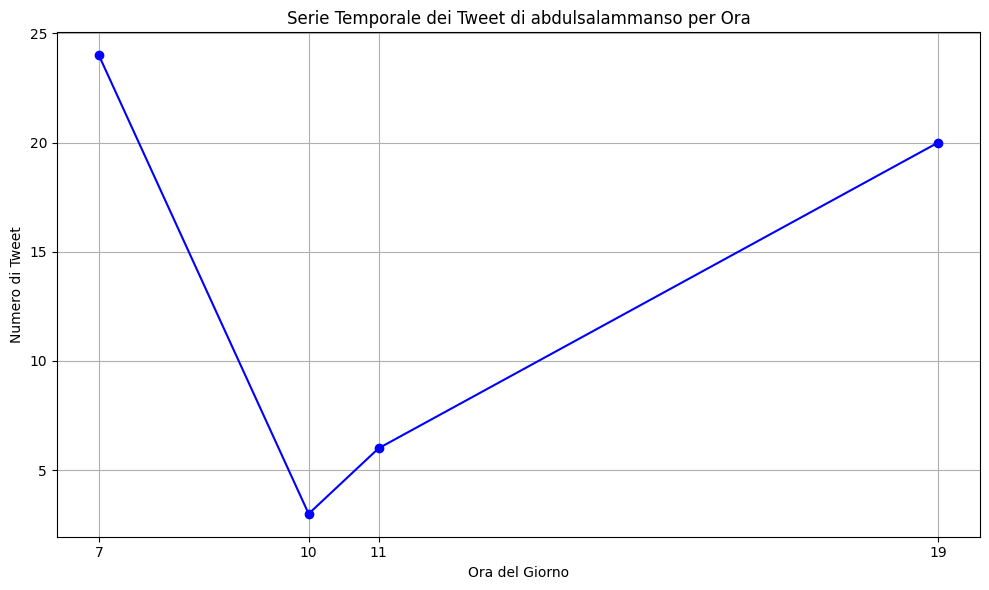

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Passo 1: Identificare l'utente con il maggior numero di tweet
user_tweet_count = filtered_df['username'].value_counts()
top_user = user_tweet_count.idxmax()
print(f"L'utente con il maggior numero di tweet è: {top_user}")

# Passo 2: Filtrare il dataset per l'utente con più tweet
top_user_tweets = filtered_df[filtered_df['username'] == top_user]

top_user_tweets['tweetcreatedts'] = pd.to_datetime(top_user_tweets['tweetcreatedts'])

# Passo 3: Creare la time series raggruppando per ora
top_user_tweets_time_series = top_user_tweets['tweetcreatedts']

# Raggruppo per ora (solo la parte dell'ora) e conta i tweet
time_series = top_user_tweets_time_series.groupby(top_user_tweets_time_series.dt.hour).size()

# Passo 4: Visualizzare il grafico della time series
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, marker='o', linestyle='-', color='b')
plt.title(f"Serie Temporale dei Tweet di {top_user} per Ora")
plt.xlabel('Ora del Giorno')
plt.ylabel('Numero di Tweet')
plt.xticks(time_series.index)  # Imposto gli xticks per ogni ora
plt.grid(True)
plt.tight_layout()  # Miglioro il layout per evitare sovrapposizioni
plt.show()


In [54]:
# Filtro i tweet dell'utente alle 7:00
tweets_alle_7 = top_user_tweets[top_user_tweets['tweetcreatedts'].dt.hour == 7]

# Mostro i tweet
print(tweets_alle_7[['tweetid', 'tweetcreatedts', 'text']])


                   tweetid      tweetcreatedts  \
12973  1629378216723992576 2023-02-25 07:10:13   
13303  1629379918822793216 2023-02-25 07:16:59   
13414  1629380562581323777 2023-02-25 07:19:33   
13496  1629380964915859462 2023-02-25 07:21:09   
13514  1629381023061495809 2023-02-25 07:21:22   
13519  1629381052555833344 2023-02-25 07:21:30   
13539  1629381160642961409 2023-02-25 07:21:55   
13552  1629381227990925313 2023-02-25 07:22:11   
13563  1629381257904758784 2023-02-25 07:22:18   
13571  1629381286484746240 2023-02-25 07:22:25   
13584  1629381314884382722 2023-02-25 07:22:32   
13615  1629381403803635713 2023-02-25 07:22:53   
13620  1629381435327930368 2023-02-25 07:23:01   
13629  1629381467091419136 2023-02-25 07:23:08   
13644  1629381504680730625 2023-02-25 07:23:17   
13658  1629381539204153344 2023-02-25 07:23:26   
13667  1629381570497765378 2023-02-25 07:23:33   
13674  1629381602085044227 2023-02-25 07:23:41   
13679  1629381632657350658 2023-02-25 07:23:48   


### 2.2.2 Analisi di tutti i bot escludendo il bot spamm

C:\Users\smike18\AppData\Local\Temp\ipykernel_10984\2762041118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_no_user['tweetcreatedts'] = pd.to_datetime(filtered_df_no_user['tweetcreatedts'])
C:\Users\smike18\AppData\Local\Temp\ipykernel_10984\2762041118.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_no_user['hour'] = filtered_df_no_user['tweetcreatedts'].dt.hour


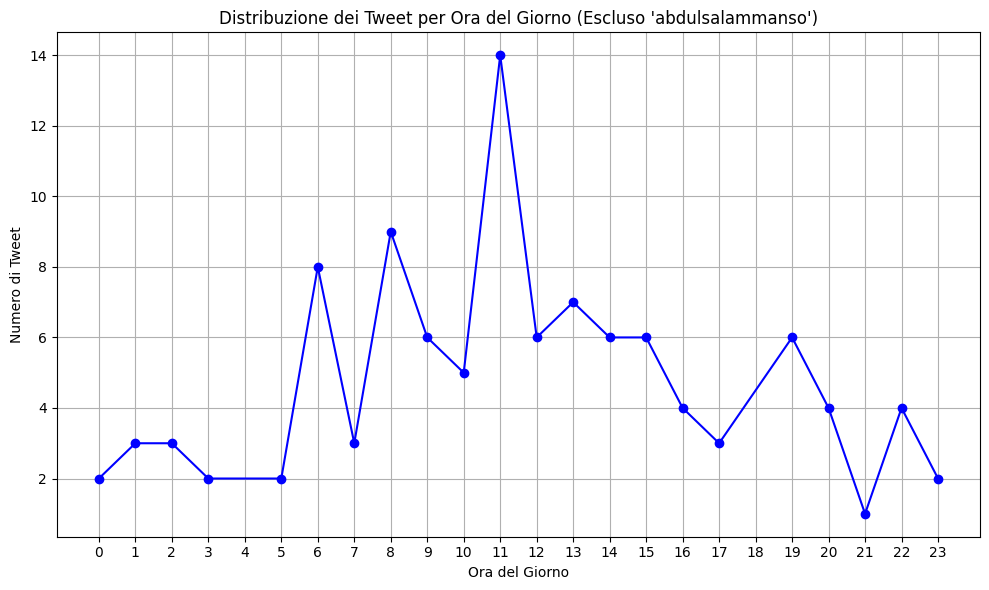

In [57]:
import matplotlib.pyplot as plt

# Escludo l'utente "abdulsalammanso"
filtered_df_no_user = filtered_df[filtered_df['username'] != "abdulsalammanso"]

# Estraggo l'ora di pubblicazione del tweet convertendo la colonna in formato datetime
filtered_df_no_user['tweetcreatedts'] = pd.to_datetime(filtered_df_no_user['tweetcreatedts'])

# Aggiungo una colonna che contiene solo l'ora di pubblicazione
filtered_df_no_user['hour'] = filtered_df_no_user['tweetcreatedts'].dt.hour

# Raggruppo i tweet per ora e conto quanti tweet sono stati pubblicati per ogni ora
hourly_tweet_count = filtered_df_no_user.groupby('hour').size()

# Creo il grafico per visualizzare la distribuzione dei tweet per ora
plt.figure(figsize=(10, 6))
plt.plot(hourly_tweet_count.index, hourly_tweet_count.values, marker='o', linestyle='-', color='b')

# Imposto il titolo e le etichette degli assi per rendere il grafico chiaro
plt.title("Distribuzione dei Tweet per Ora del Giorno (Escluso 'abdulsalammanso')")
plt.xlabel("Ora del Giorno")
plt.ylabel("Numero di Tweet")

# Imposto le ore da 0 a 23 sull'asse x per una migliore leggibilità
plt.xticks(range(24))
plt.grid(True)  # Aggiungo una griglia per migliorare la leggibilità del grafico
plt.tight_layout()  # Miglioro il layout per evitare sovrapposizioni

# Mostro il grafico
plt.show()


## 2.3 Analisi testo tweet

### 2.3.1 Verifica quantità tweet unici

In [61]:
# Conto i tweet unici basandosi sul campo 'text'
unique_tweet_count = filtered_df['text'].nunique()

# Mostro i risultati
print(f"Numero totale di tweet: {len(filtered_df)}")
print(f"Numero di tweet unici: {unique_tweet_count}")

Numero totale di tweet: 159
Numero di tweet unici: 120


### 2.3.2 Identificazione Parole frequenti

In [63]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 2.2 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.1 MB 2.2 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.1 MB 2.3 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.1 MB 2.4 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 2.2 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 2.2 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 2.2 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.1 MB 1.5 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.1 MB 1.5 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.1 MB 1.5 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.1 MB 1.5 MB/s eta 0:00:06
   ----------

In [65]:
!pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 2.8 MB/s eta 0:00:01
   ---------------- ----------------------- 1.0/2.6 MB 2.6 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.6 MB 2.6 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
    --------------------------------------- 0.5/24.0 MB 2.8 MB/s eta 0:00:09
   - -------------------------------------- 1.0/24.0 MB 2.6 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/24.0 MB 2.6 MB/s eta 0:00:09
   --- ------------------------------------ 2.1/24.0 MB 2.6 MB/s eta 0:00:09
   ---- ----------------------------------- 2.6/24.0 MB 2.6 MB/s eta 0:00:09
   ----- ---------------------------------- 3.1/24.0 MB 2.6 MB/s eta 0:00:09
   ------ ---------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


C:\Users\smike18\AppData\Local\Temp\ipykernel_10984\2411029136.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cleaned_text'] = filtered_df['text'].apply(preprocess_text)


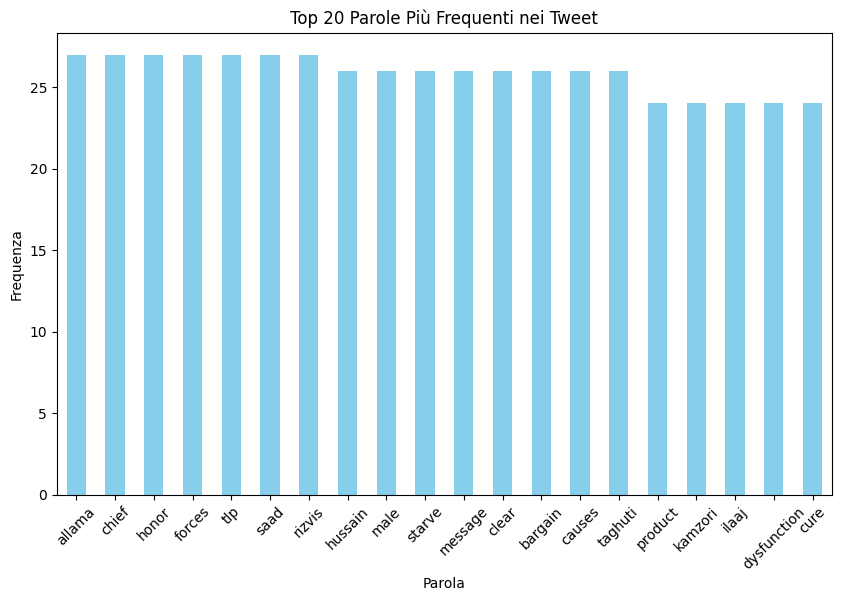

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Preprocesso il testo
filtered_df['cleaned_text'] = filtered_df['text'].apply(preprocess_text)

# Creazione della matrice di frequenza delle parole
vectorizer = CountVectorizer(stop_words='english', max_features=30)  # Limita ai 20 più frequenti
word_count_matrix = vectorizer.fit_transform(filtered_df['cleaned_text'])

# Ottiengo le parole più frequenti
word_freq = pd.DataFrame(word_count_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Visualizzo le parole più frequenti
plt.figure(figsize=(10,6))
word_freq.sum().sort_values(ascending=False).head(20).plot(kind='bar', color='skyblue')
plt.title("Top 20 Parole Più Frequenti nei Tweet")
plt.ylabel("Frequenza")
plt.xlabel("Parola")
plt.xticks(rotation=45)
plt.show()


### 2.3.3 Correlazione tra parole

In [89]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Funzione per preprocessare il testo dei tweet: rimuovo simboli, link, menzioni, hashtag e converto in minuscolo
def preprocess_text(text):
    text = re.sub(r"http\S+|@\S+|#\S+|[^a-zA-Z\s]", "", text)
    return text.lower()

# Rimuovo i tweet duplicati basandomi solo sul testo unico
unique_tweets = filtered_df['text'].drop_duplicates()

# Pulisco i testi dei tweet usando la funzione preprocess_text
cleaned_texts = unique_tweets.apply(preprocess_text)

# Creo una matrice Bag of Words usando bigrammi (coppie di parole consecutive)
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2))  # Considero solo bigrammi
X = vectorizer.fit_transform(cleaned_texts)

# Calcolo la matrice di co-occorrenza: moltiplico la trasposta di X con X
co_occurrence_matrix = (X.T * X)
co_occurrence_matrix.setdiag(0)  # Imposto a 0 la diagonale per escludere correlazioni con sé stessi

# Calcolo la similarità del coseno tra le righe della matrice di co-occorrenza
cosine_sim = cosine_similarity(co_occurrence_matrix)

# Estraggo i nomi delle parole (bigrammi) dalla matrice
words = vectorizer.get_feature_names_out()

# Creo una lista per memorizzare le coppie di parole con la loro similarità
pairs = []

# Itero tra le parole per trovare tutte le correlazioni positive
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        if cosine_sim[i, j] > 0:  # Considero solo similarità positive
            pairs.append((words[i], words[j], cosine_sim[i, j]))

# Ordino le coppie di parole per similarità in ordine decrescente
sorted_pairs = sorted(pairs, key=lambda x: x[2], reverse=True)

# Estraggo le prime 50 coppie con la similarità più alta
top_50_pairs = sorted_pairs[:50]

# Stampo le coppie di parole e la loro similarità
for word1, word2, similarity in top_50_pairs:
    print(f"Parole correlate: {word1} - {word2} | Similarità Coseno: {similarity:.4f}")


Parole correlate: delhi maharashtra - honor maharashtra | Similarità Coseno: 0.9608
Parole correlate: honor delhi - honor maharashtra | Similarità Coseno: 0.9608
Parole correlate: bargain honor - honor maharashtra | Similarità Coseno: 0.9569
Parole correlate: clear message - honor maharashtra | Similarità Coseno: 0.9569
Parole correlate: forces starve - honor maharashtra | Similarità Coseno: 0.9569
Parole correlate: honor maharashtra - hussain rizvis | Similarità Coseno: 0.9569
Parole correlate: honor maharashtra - message taghuti | Similarità Coseno: 0.9569
Parole correlate: honor maharashtra - rizvis clear | Similarità Coseno: 0.9569
Parole correlate: honor maharashtra - saad hussain | Similarità Coseno: 0.9569
Parole correlate: honor maharashtra - starve bargain | Similarità Coseno: 0.9569
Parole correlate: honor maharashtra - taghuti forces | Similarità Coseno: 0.9569
Parole correlate: emirates places - emirates united | Similarità Coseno: 0.9565
Parole correlate: emirates places -

In [8]:
# Verifico che il campo 'text' esista nel dataset
if 'text' in filtered_df.columns:
    # Salvo i tweet (colonna 'text') in un file di testo
    output_file = 'tweets_output.txt'
    filtered_df['text'].to_csv(output_file, index=False, header=False)
    print(f"Tweet salvati nel file: {output_file}")
else:
    print("La colonna 'text' non è presente nel dataset.")


Tweet salvati nel file: tweets_output.txt
